In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading Data
- train
- test
- sample_submission

In [111]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
smp = pd.read_csv('data/sample_submission.csv')

orig = pd.read_csv('data/Churn_Modelling.csv')

In [8]:
orig

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Overview

In [27]:
train.columns.tolist()

['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [28]:
num_features = train.select_dtypes(include=np.number).columns.tolist()
cat_features = train.select_dtypes(exclude=np.number).columns.tolist()

print('nums: ', num_features)
print('cats: ', cat_features)

nums:  ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
cats:  ['Surname', 'Geography', 'Gender']


## Pieplot & Barchart Function
- by feature name

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\310093594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Accent')


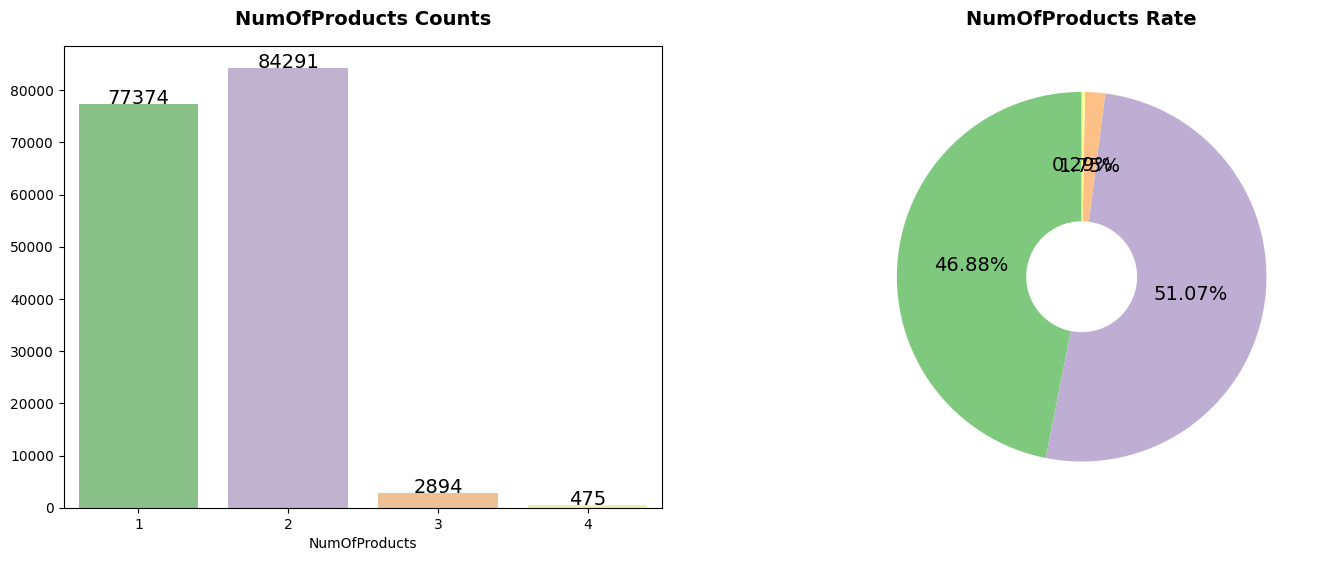

In [67]:
def visualize_by_feature(train_df, colname):

    plt.figure(figsize=(17,6))
    plt.subplot(1,2,1)

    attrition_rate = train_df[f"{colname}"].value_counts().sort_index()

    sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Accent')
    plt.title(f"{colname} Counts",fontweight="black", size=14, pad=15)
    for i, v in enumerate(attrition_rate.values):
        plt.text(i, v, v,ha="center", fontsize=14)

    plt.subplot(1,2,2)
    colors = sns.color_palette('Accent', len(attrition_rate))
    plt.pie(attrition_rate, autopct="%.2f%%", textprops={"size":14},
            colors = colors,startangle=90)
    center_circle = plt.Circle((0, 0), 0.3, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.title(f"{colname} Rate",fontweight="black",size=14 ,pad=15)

    plt.show()

visualize_by_feature(train, 'NumOfProducts')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\310093594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Accent')


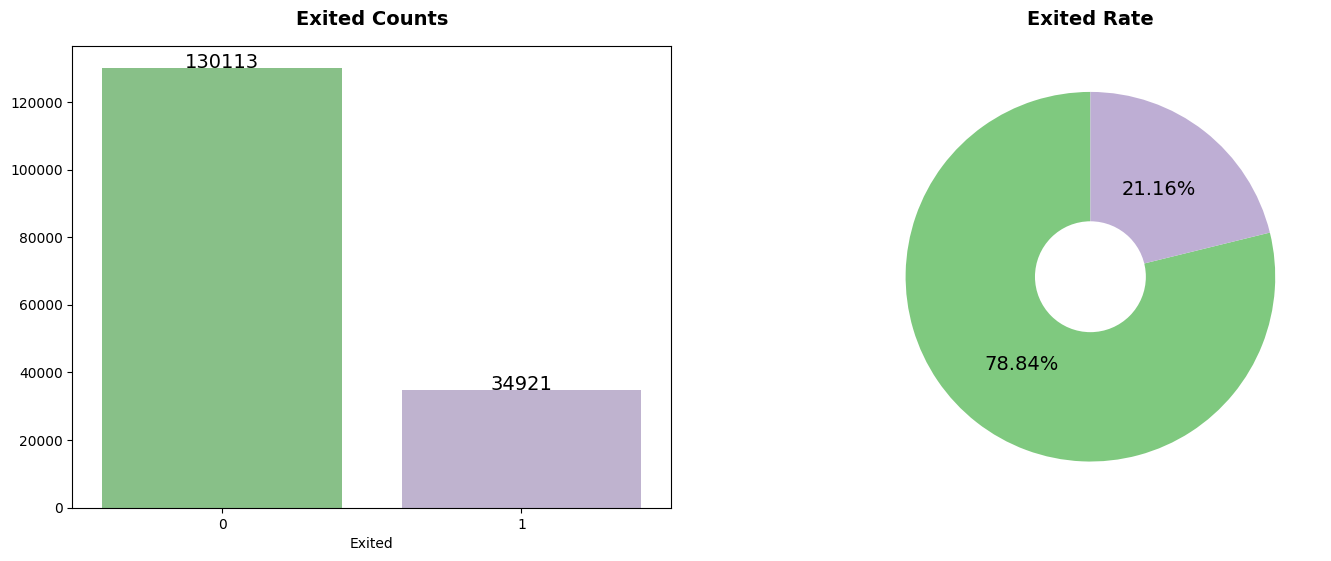

In [68]:
visualize_by_feature(train, 'Exited')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\310093594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Accent')


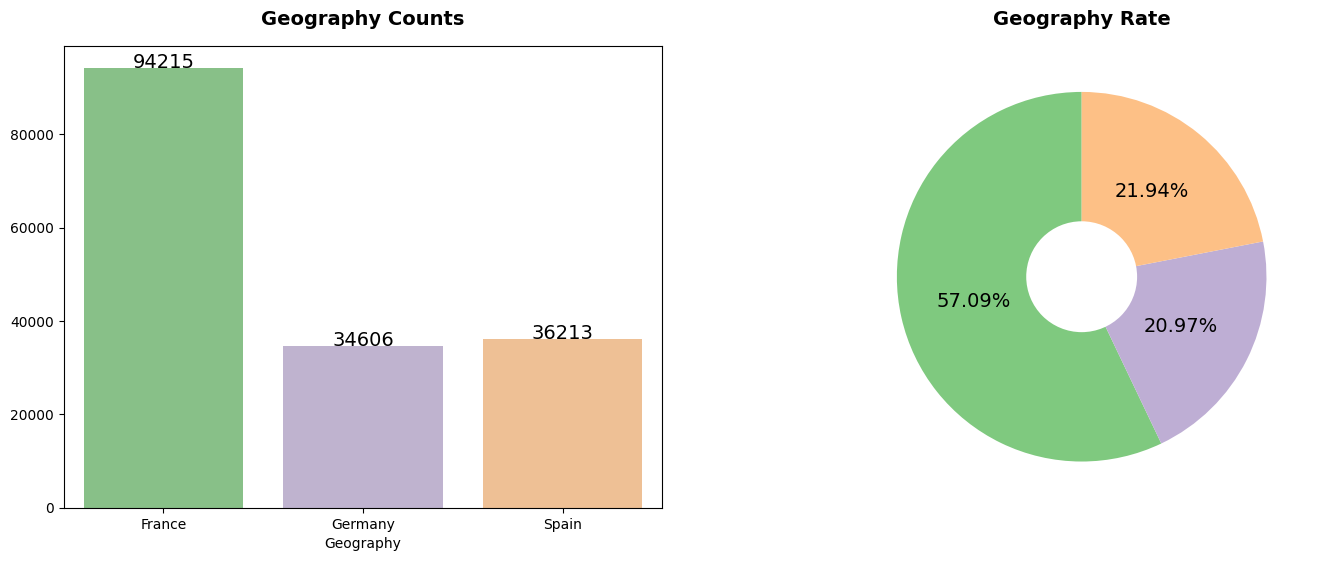

In [69]:
visualize_by_feature(train, 'Geography')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\310093594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Accent')


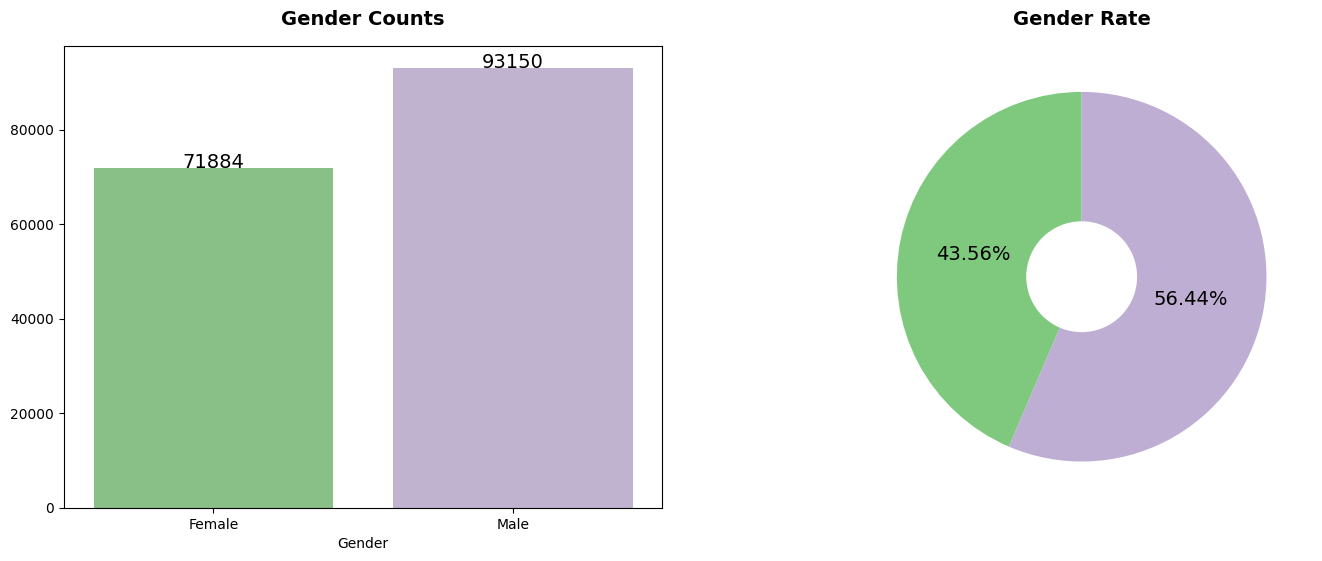

In [70]:
visualize_by_feature(train, 'Gender')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\310093594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Accent')


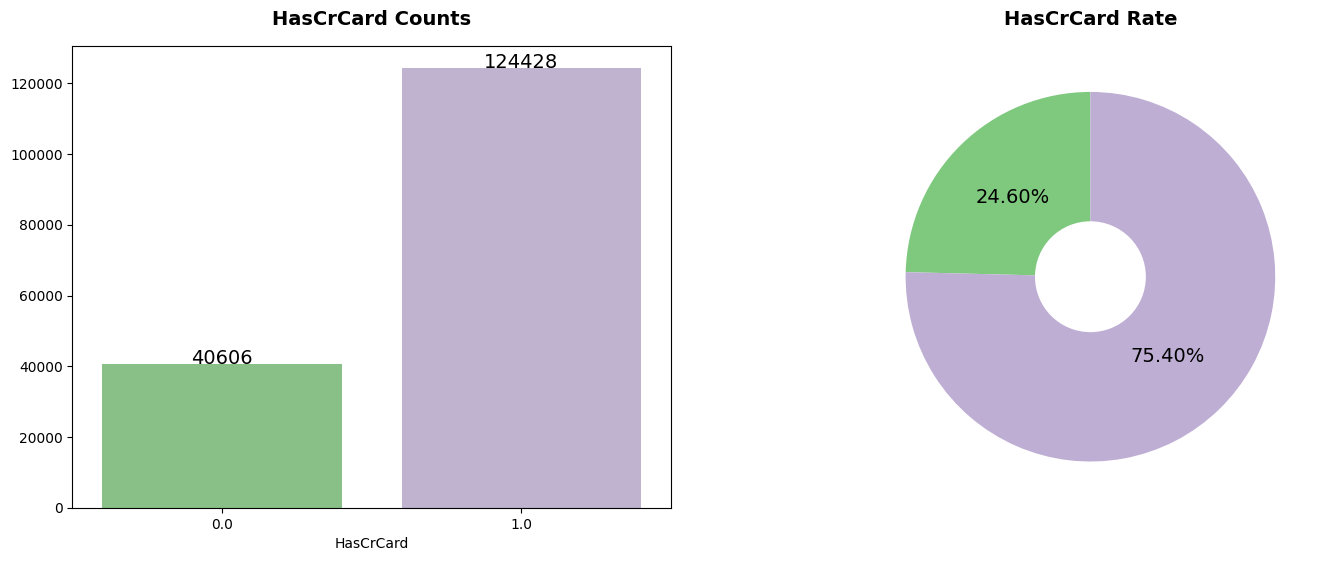

In [71]:
visualize_by_feature(train, 'HasCrCard')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\310093594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Accent')


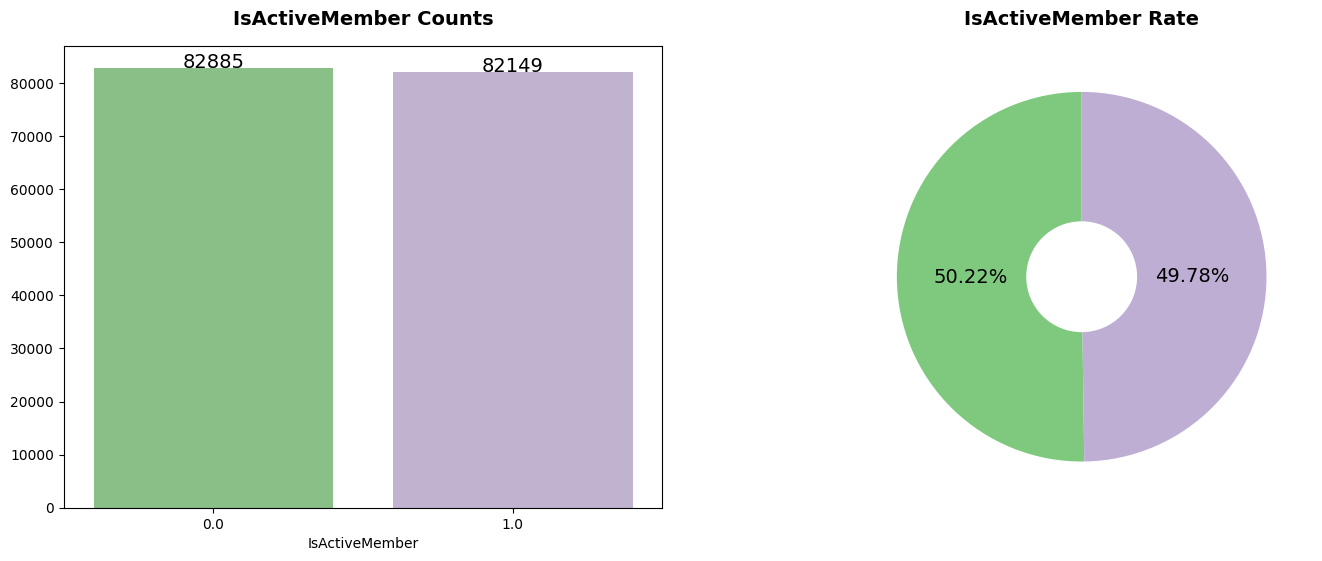

In [72]:
visualize_by_feature(train, 'IsActiveMember')

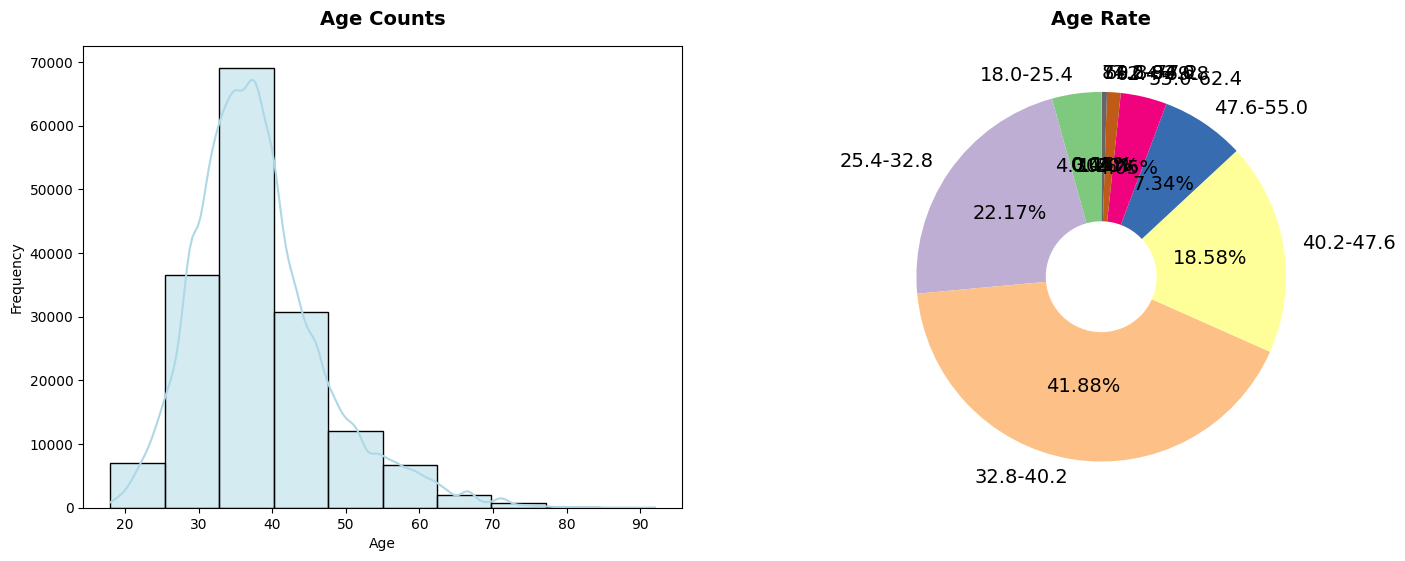

In [76]:
def visualize_by_feature_hist(train_df, colname):
    plt.figure(figsize=(17, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(train_df[colname], kde=True, bins=10, color='lightblue')
    plt.title(f"{colname} Counts", fontweight="black", size=14, pad=15)
    plt.xlabel(colname)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    hist_values, bin_edges = np.histogram(train_df[colname], bins=10)  # 히스토그램 값을 수동 계산
    plt.pie(
        hist_values,
        labels=[f"{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}" for i in range(len(bin_edges) - 1)],
        autopct="%.2f%%",
        textprops={"size": 14},
        colors=sns.color_palette('Accent', len(hist_values)),
        startangle=90
    )

    center_circle = plt.Circle((0, 0), 0.3, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    plt.title(f"{colname} Rate", fontweight="black", size=14, pad=15)
    plt.show()

visualize_by_feature_hist(train, 'Age')

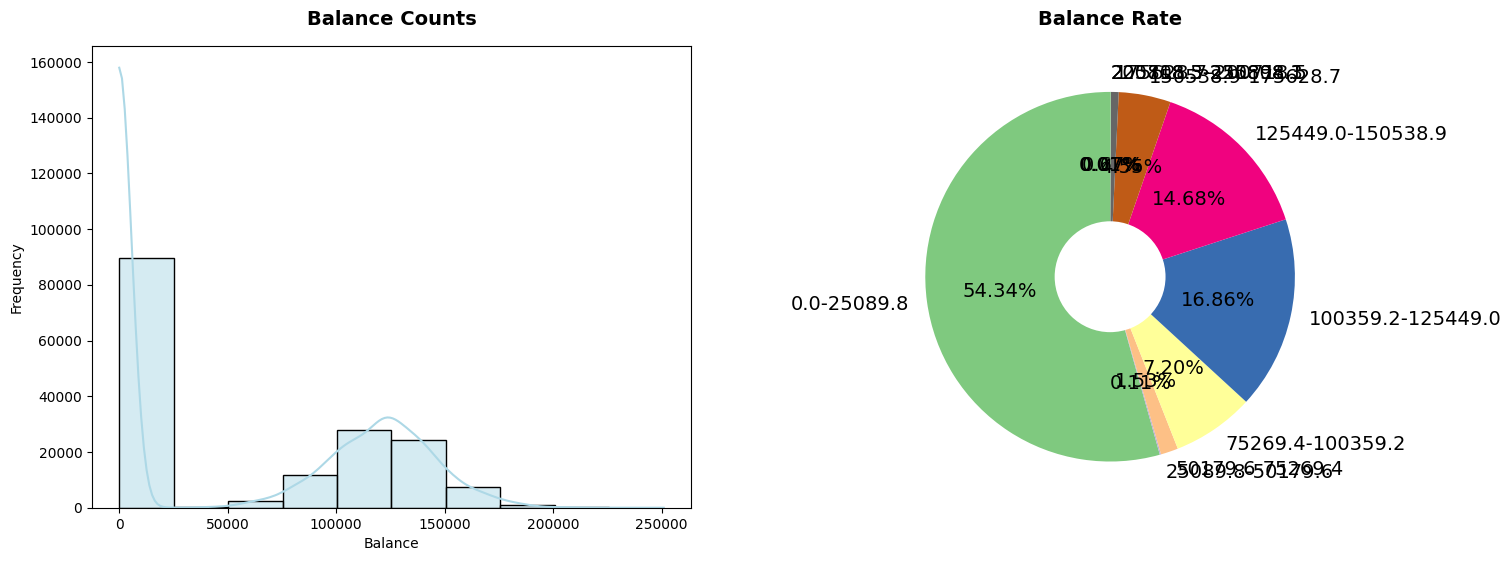

In [77]:
visualize_by_feature_hist(train, 'Balance')

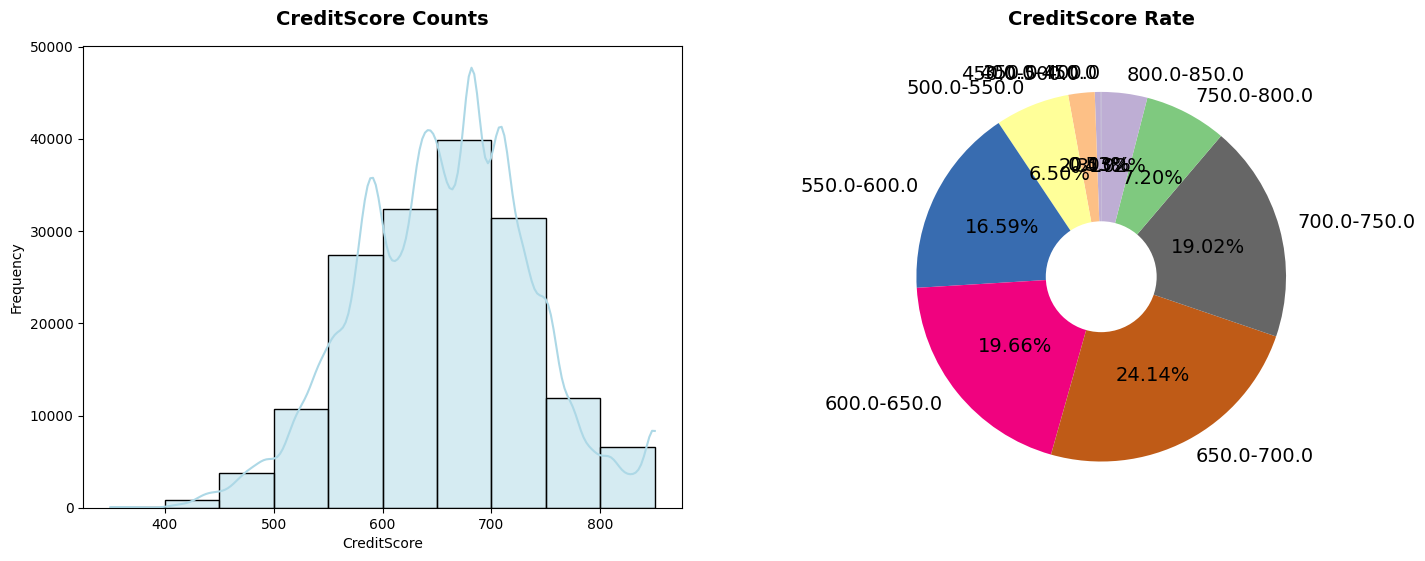

In [78]:
visualize_by_feature_hist(train, 'CreditScore')

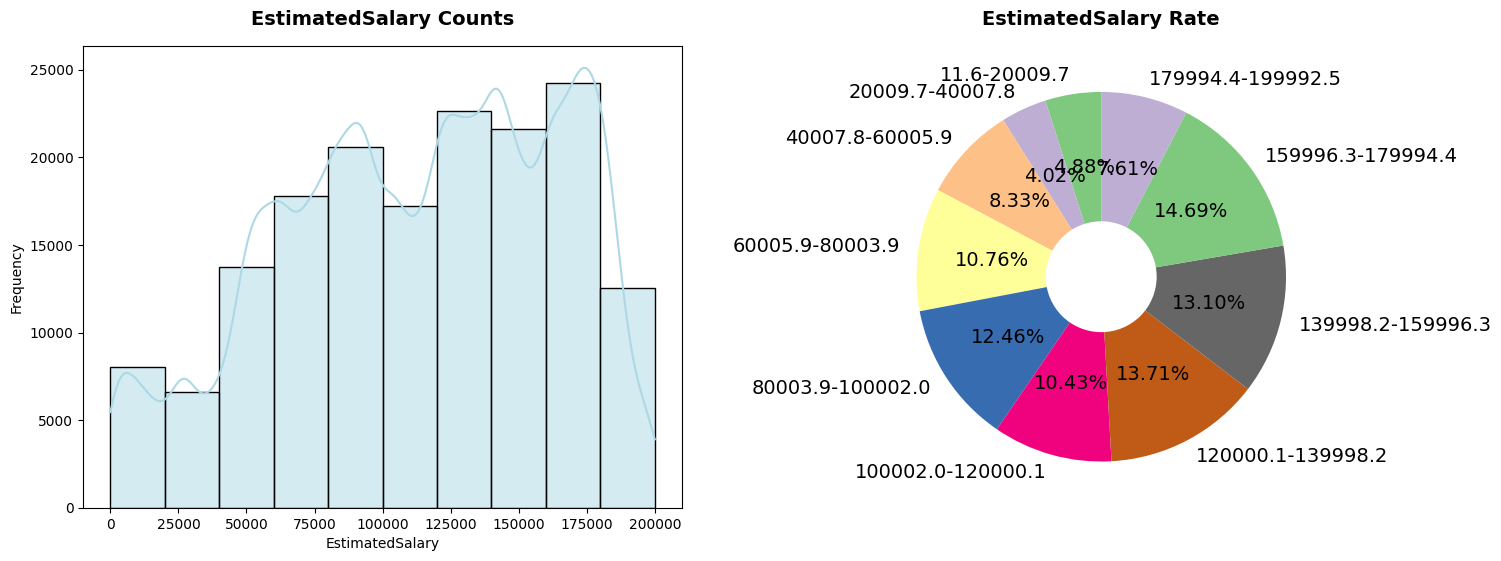

In [79]:
visualize_by_feature_hist(train, 'EstimatedSalary')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\310093594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Accent')


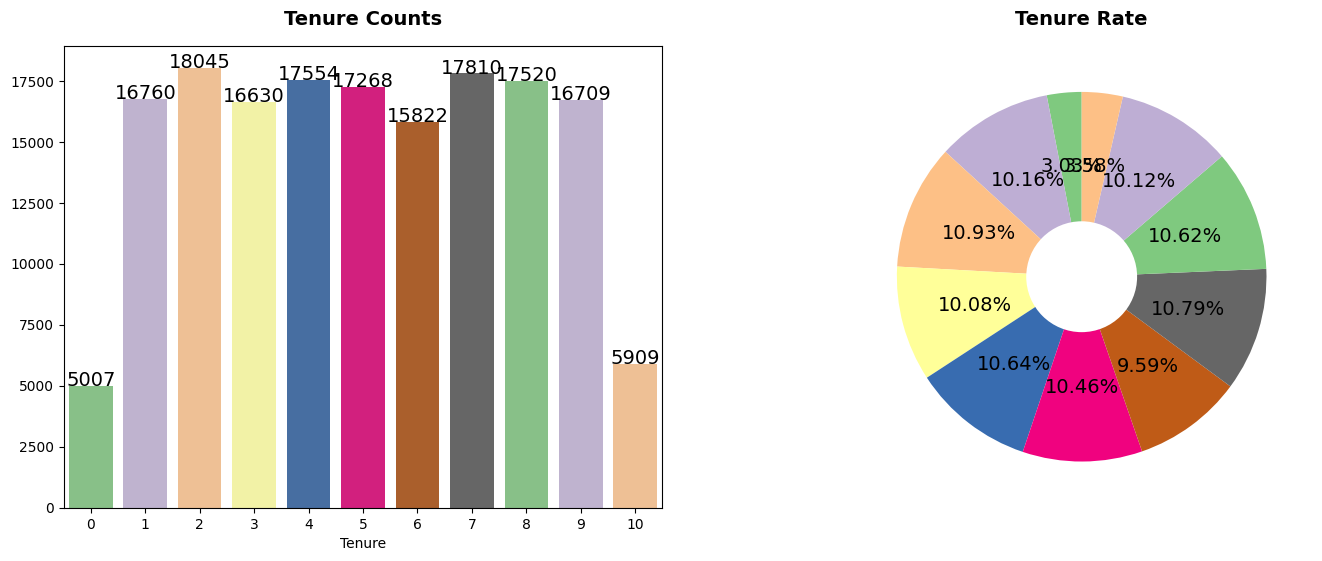

In [98]:
visualize_by_feature(train, 'Tenure')

In [119]:
import matplotlib.ticker as ticker

def hist_with_hue(df, col, attrition_col):
    plt.figure(figsize=(13.5, 6))
    
    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')
    
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue='attrition_label', data=df, kde=True, palette='Accent')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='attrition_label', y=col, data=df, palette='Accent')
    plt.title(f"Distribution by {col} & {attrition_col}", fontweight="black", size=14, pad=10)
    
    plt.tight_layout()
    plt.show()

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\4048365919.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition_label', y=col, data=df, palette='Accent')


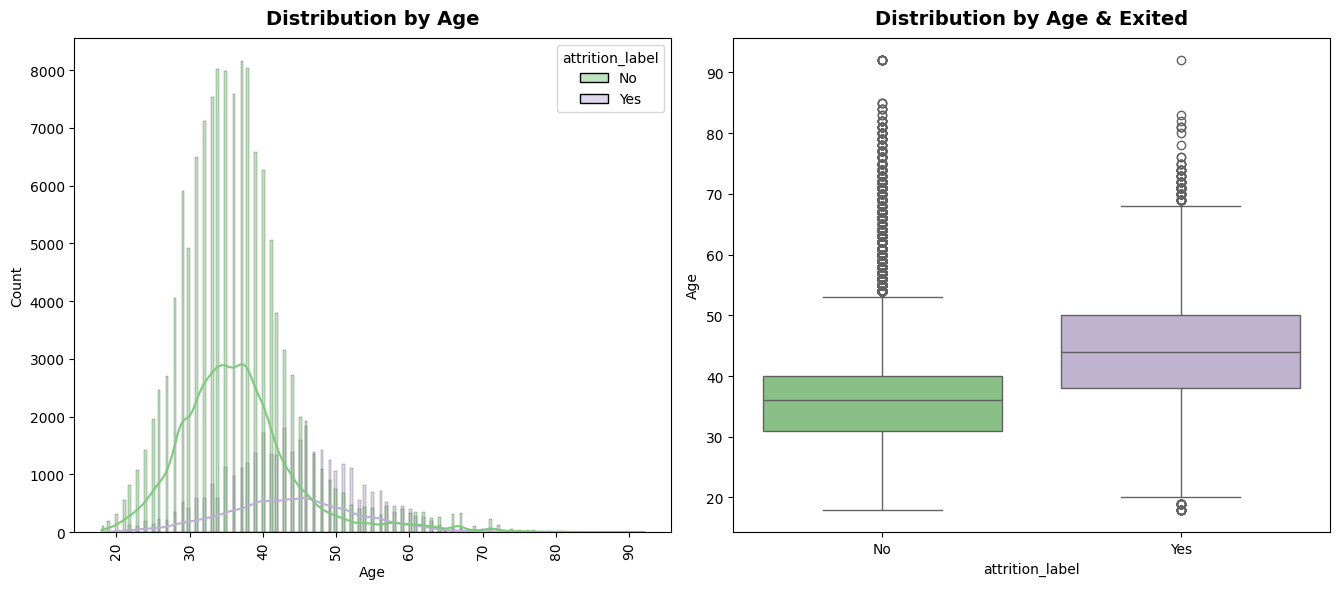

In [120]:
hist_with_hue(train, 'Age', 'Exited')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\4048365919.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition_label', y=col, data=df, palette='Accent')


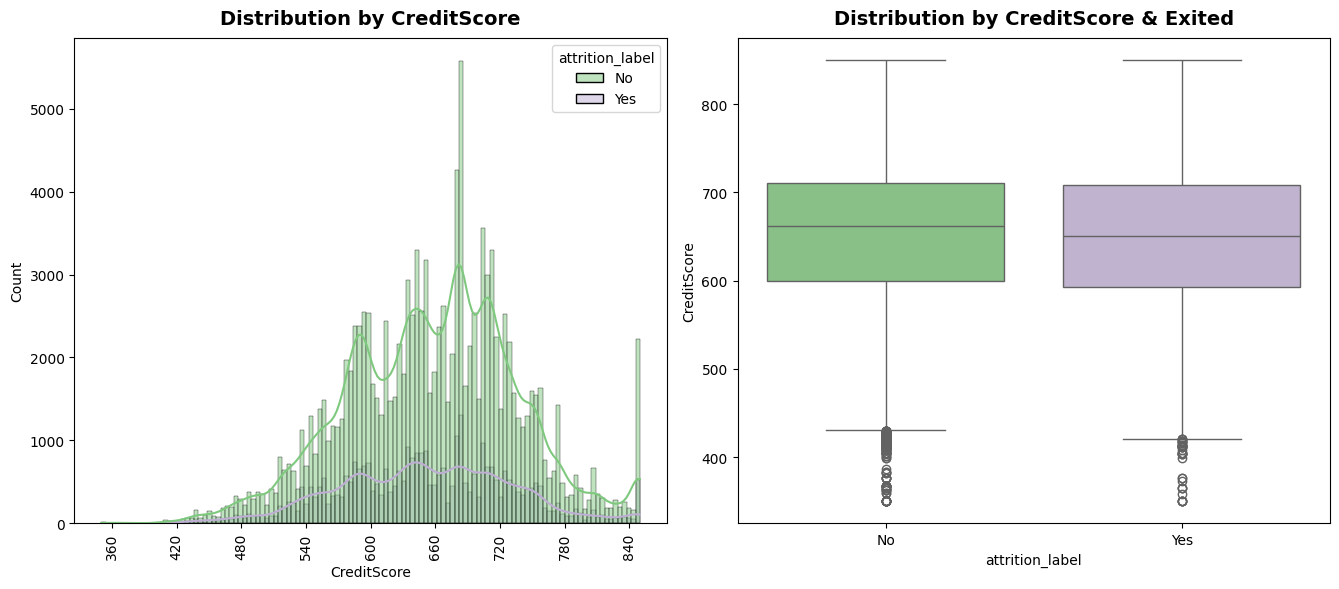

In [124]:
hist_with_hue(train, 'CreditScore', 'Exited')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_21116\4048365919.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition_label', y=col, data=df, palette='Accent')


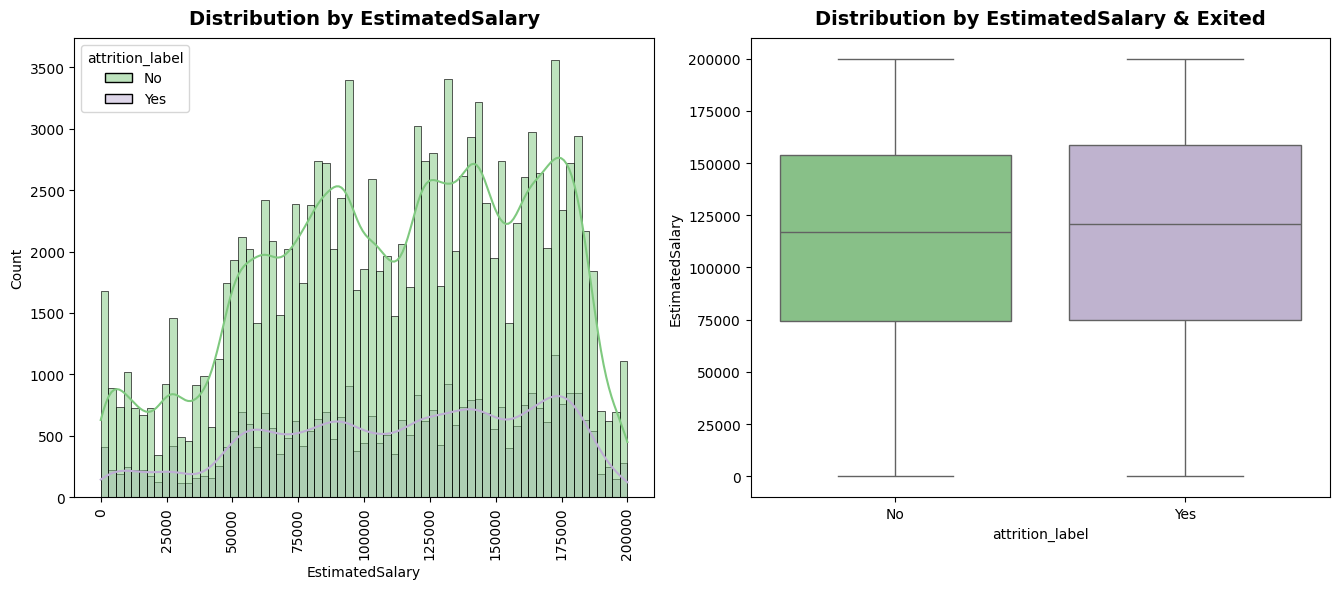

In [132]:
hist_with_hue(train, 'EstimatedSalary', 'Exited')

In [123]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'attrition_label'],
      dtype='object')

# Basic Statistics

In [80]:
num_features = [feature for feature in num_features if feature not in ['HasCrCard', 'IsActiveMember', 'Exited']]
nums = train[num_features]

NumDesc = pd.DataFrame(index = num_features)
NumDesc['type'] = nums.dtypes
NumDesc['count'] = nums.count()
NumDesc['unique_num'] = nums.nunique()
NumDesc['mean'] = nums.mean()
NumDesc['min'] = nums.min()
NumDesc['median'] = nums.median()
NumDesc['max'] = nums.max()
NumDesc['nulls'] = nums.isnull().sum()

NumDesc

,type,count,unique_num,mean,min,median,max,nulls
id,int64,165034,165034,8.251650e+04,0.00,82516.5,165033.00,0
CustomerId,int64,165034,23221,1.569201e+07,15565701.00,15690169.0,15815690.00,0
CreditScore,int64,165034,457,6.564544e+02,350.00,659.0,850.00,0
Age,float64,165034,71,3.812589e+01,18.00,37.0,92.00,0
Tenure,int64,165034,11,5.020353e+00,0.00,5.0,10.00,0
Balance,float64,165034,30075,5.547809e+04,0.00,0.0,250898.09,0
NumOfProducts,int64,165034,4,1.554455e+00,1.00,2.0,4.00,0
EstimatedSalary,float64,165034,55298,1.125748e+05,11.58,117948.0,199992.48,0


In [96]:
cat_features_2 = list(cat_features) + ['HasCrCard', 'IsActiveMember']
cats = train[cat_features_2]

CatDesc = pd.DataFrame(index = cat_features_2)
CatDesc['type'] = cats.dtypes
CatDesc['count'] = cats.count()
CatDesc['unique_num'] = cats.nunique()
CatDesc['nulls'] = cats.isnull().sum()
CatDesc



,type,count,unique_num,nulls
Surname,object,165034,2797,0
Geography,object,165034,3,0
Gender,object,165034,2,0
HasCrCard,float64,165034,2,0
IsActiveMember,float64,165034,2,0


In [31]:
# id 제거, 데이터 overview

train_copyed = train.copy()
y = train_copyed.pop('Exited')
X = train_copyed.drop('id', axis = 1)
X.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50


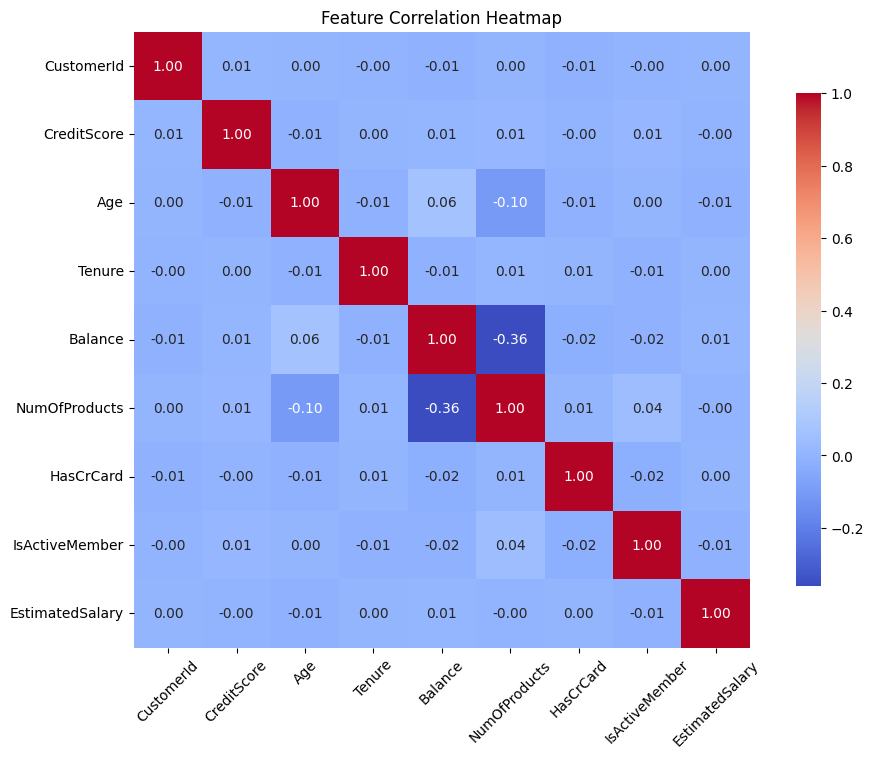

In [99]:
# 문자열 데이터 제거
train_numeric = X.select_dtypes(include=np.number)

# 상관관계 계산
correlation_matrix = train_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation = 45)
plt.title('Feature Correlation Heatmap')
plt.show()

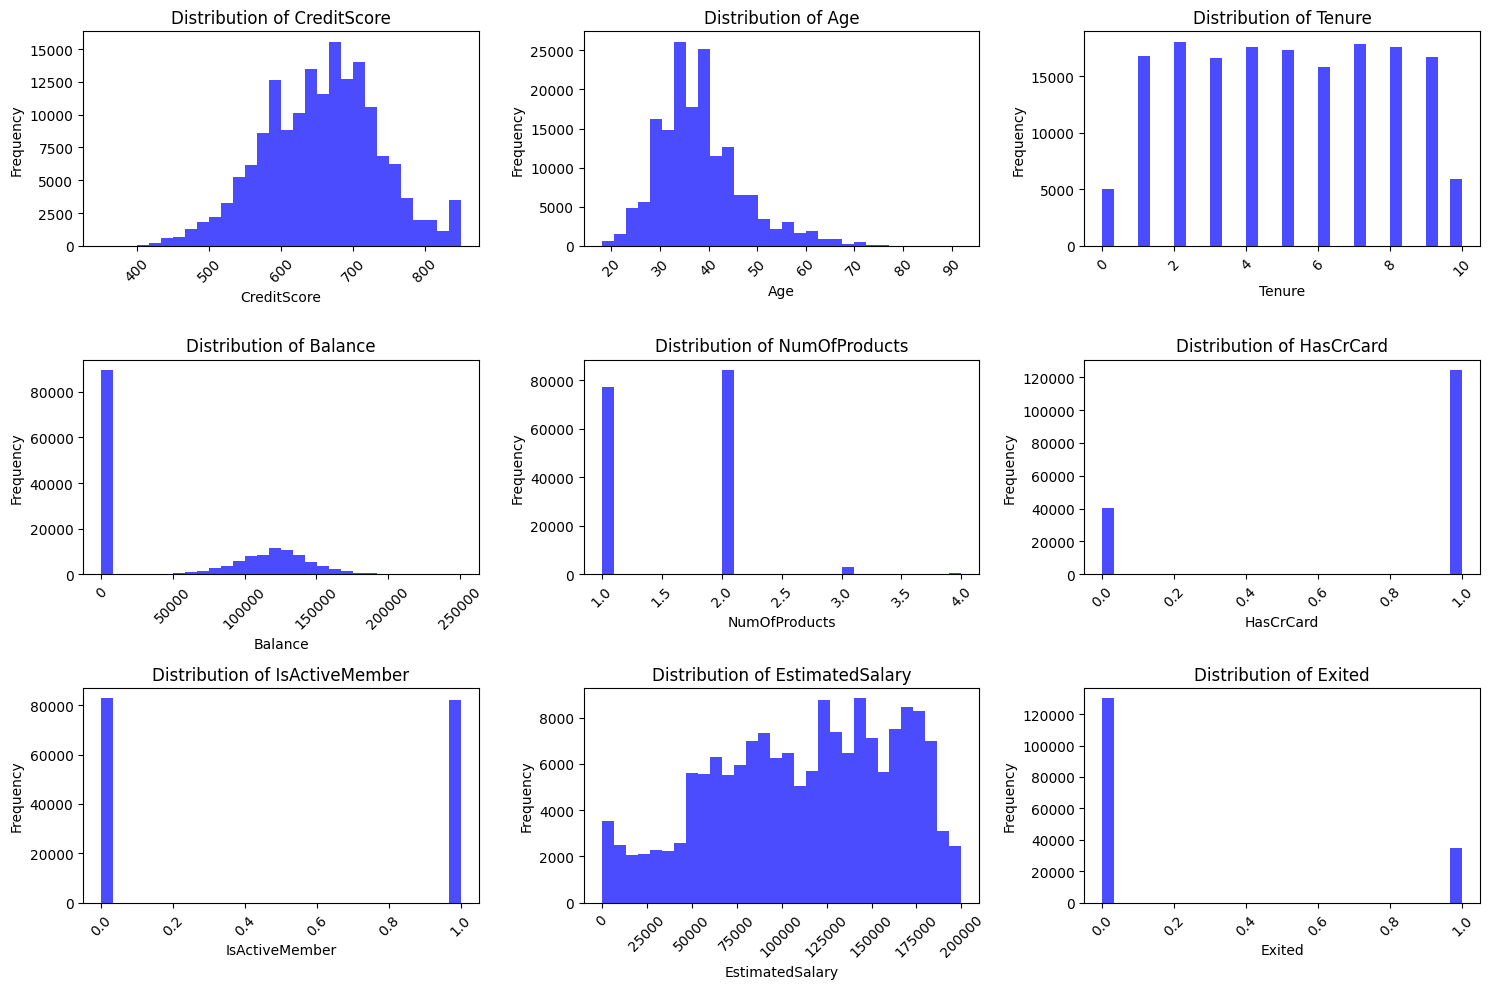

In [25]:
# 숫자형 칼럼에 대한 히스토그램 그리기
num_features = [feature for feature in num_features if feature not in ['id', 'CustomerId']]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)  # 3행 3열의 서브플롯
    plt.hist(train[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation = 45)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [103]:
train.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


In [109]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 문자열을 Label Encoding
label_encoders = {}
for column in train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column].astype(str)) 
    label_encoders[column] = le 

X = train.drop(columns=['Exited', 'id'])  # 'Exited' 열을 제외한 모든 열
y = train['Exited']  # 'Exited' 열

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# statsmodels에서 상수항을 추가해야 하므로, 상수항을 추가합니다.
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Logit 모델 생성
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()

# 모델 결과 출력
print(logit_result.summary())

# 예측값 구하기
y_pred_prob = logit_result.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # 0.5를 기준으로 이진 분류

# Confusion Matrix와 Classification Report 출력
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.406427
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:               132027
Model:                          Logit   Df Residuals:                   132014
Method:                           MLE   Df Model:                           12
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2129
Time:                        17:13:01   Log-Likelihood:                -53659.
converged:                       True   LL-Null:                       -68173.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0922      1.688      3.610      0.000       2.784       9.400
CustomerId    